In [1]:
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Apple", "Big Tech", "S&P 500", "Dow", "Smartphone", "Cellular", "Oranges", "UCLA", "NBA Playoffs"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
df = df.resample("Q").mean()

In [10]:
# ALIGN DATA
df = df.fillna(0)
X = df
X = X[X.index.isin(y.index)]
y = y[y.index.isin(X.index)]

In [11]:
#temp = pd.concat([y, X],axis = 1).dropna()
#y = temp[["BasicEPS"]].copy()
#X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [14]:
from sklearn.linear_model import Lasso

In [15]:
l = Lasso(alpha = 0.05)
l.fit(X_scaled, y)
Coefficients = l.coef_

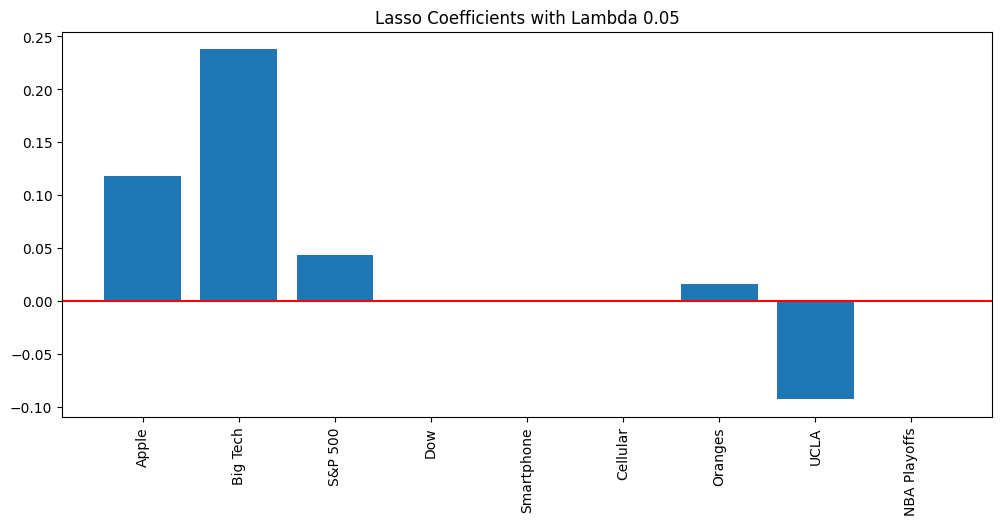

In [16]:
plt.figure(figsize = (12,5))
plt.bar(range(len(Coefficients)), Coefficients)
plt.xticks(range(len(Coefficients)), X.columns, rotation='vertical')
plt.axhline(0, color = "red")
plt.title('Lasso Coefficients with Lambda 0.05')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

### They make some sense. For example, the positive relationship of Apple and Big Tech with the BasicEPS makes sense, since the release of the iPhone will lead to people googling these terms more frequently. However, it is unusual to see zero coefficient on Smartphone or Cellular. Additionally, the uptick in S&P500 makes a little bit of sense, but the uptick in Oranges is unexpected. Also, the highly negative relationship on UCLA is unusual, since I assumed that one would be uncorrelated as well. 